In [74]:
import pandas as pd
import math

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt


In [75]:
df = pd.read_csv('final.csv')

In [76]:
df.head()

,Data,TemperatureMedium,TemperatureMin,TemperatureMax,Precipitacao (mm),EndOfWeek,Consumption
0,2015-01-01,27.30,23.9,32.5,0.0,0,25.461
1,2015-01-02,27.02,24.5,33.5,0.0,0,28.972
2,2015-01-03,24.82,22.4,29.9,0.0,1,30.814
3,2015-01-04,23.98,21.5,28.6,1.2,1,29.799
4,2015-01-05,23.82,21.0,28.3,0.0,0,28.900


In [77]:
df.info()
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
Data                 365 non-null object
TemperatureMedium    365 non-null float64
TemperatureMin       365 non-null float64
TemperatureMax       365 non-null float64
Precipitacao (mm)    365 non-null float64
EndOfWeek            365 non-null int64
Consumption          365 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 20.0+ KB


Data                  object
TemperatureMedium    float64
TemperatureMin       float64
TemperatureMax       float64
Precipitacao (mm)    float64
EndOfWeek              int64
Consumption          float64
dtype: object

In [78]:
df=df[['TemperatureMedium', 'Consumption']]

In [79]:

X=df[['TemperatureMedium']]
#mask = df.Consumption > 50
#column_name = 'Consumption'
#df.loc[mask, column_name] = 25
Y=df[['Consumption']]
Y.max()

Consumption    37.937
dtype: float64

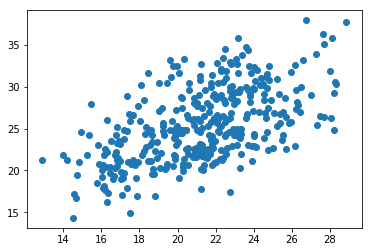

In [80]:
plt.scatter(X,Y,)

In [81]:
X_train, X_test , y_train , y_test = train_test_split(X,Y)

In [82]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

print('Training score: {}'.format(lr_model.score(X_train, y_train)))
print('Test score: {}'.format(lr_model.score(X_test, y_test)))

y_pred = lr_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)

print('RMSE: {}'.format(rmse))

Training score: 0.30448746329779364
Test score: 0.3823885709121857
RMSE: 3.650109688202131


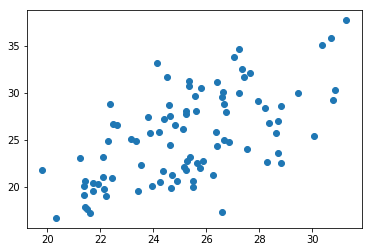

In [70]:
plt.scatter(y_pred,y_test)

In [71]:
steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', LinearRegression())
]

pipeline = Pipeline(steps)

pipeline.fit(X_train, y_train)

print('Training score: {}'.format(pipeline.score(X_train, y_train)))
print('Test score: {}'.format(pipeline.score(X_test, y_test)))

Training score: 0.3121168511094503
Test score: 0.37196331507055513


In [72]:
steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Ridge(alpha=10, fit_intercept=True))
]

ridge_pipe = Pipeline(steps)
ridge_pipe.fit(X_train, y_train)

print('Training Score: {}'.format(ridge_pipe.score(X_train, y_train)))
print('Test Score: {}'.format(ridge_pipe.score(X_test, y_test)))

Training Score: 0.31173095687861785
Test Score: 0.36907065083319857


In [73]:
steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Lasso(alpha=0.3, fit_intercept=True))
]

lasso_pipe = Pipeline(steps)

lasso_pipe.fit(X_train, y_train)

print('Training score: {}'.format(lasso_pipe.score(X_train, y_train)))
print('Test score: {}'.format(lasso_pipe.score(X_test, y_test)))

Training score: 0.30628380988425363
Test score: 0.3594658519797387
